## Singleton (ang. Singleton)

**Typ**: kreacyjny \
**Zakres**: klasowy

Klasyczna definicja wzorca Singleton

<div style='border: 1px solid; padding: 20px; text-align: cetnre;'>
    Wzorzec <b>Singleton</b> zapewnia, że dana klasa będzie miała tylko i wyłacznie jedną instancję obiektu i zapewnia globalny punkt dostępu do tej instancji.
</div>

Diagram klas

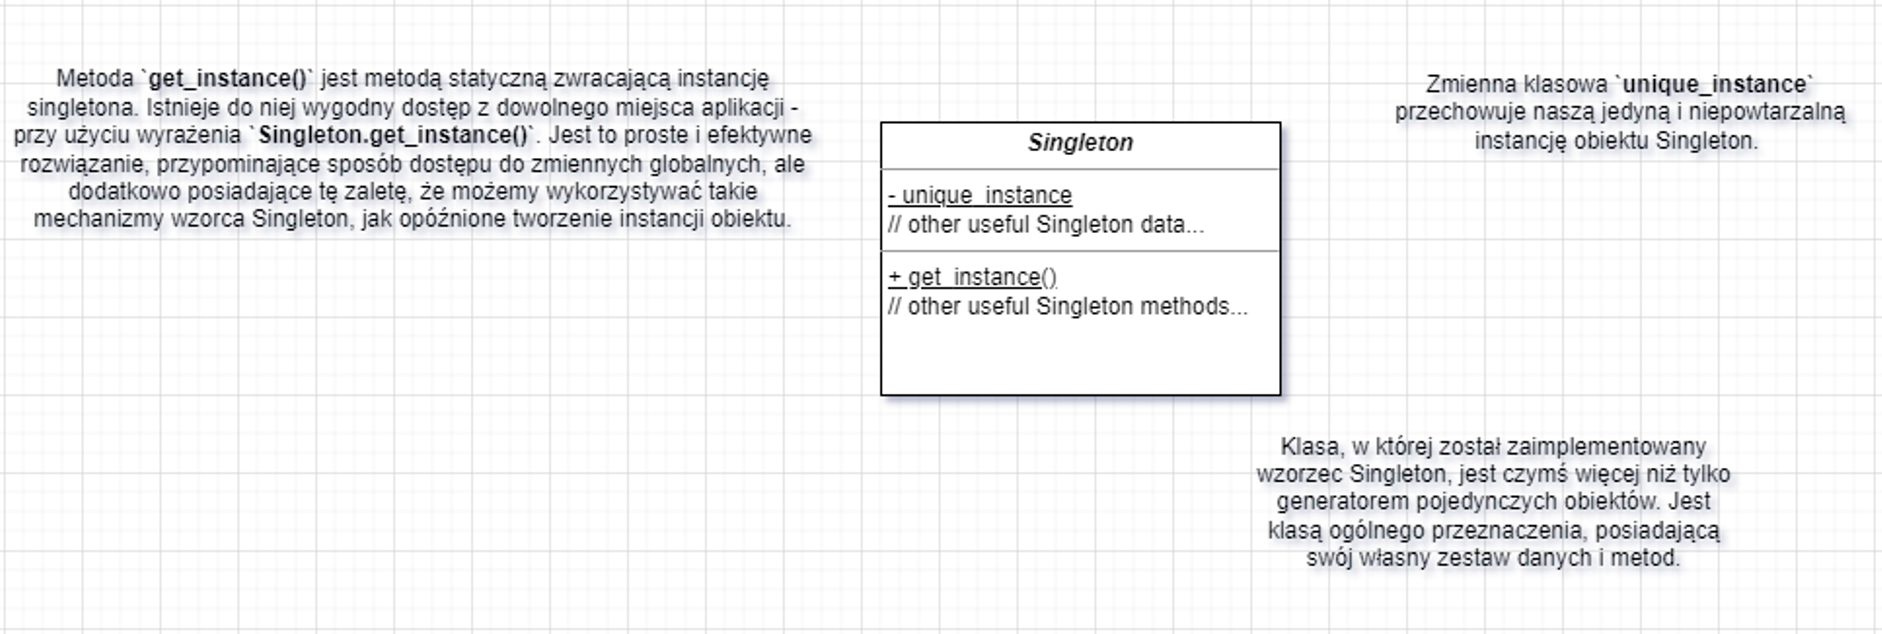

Istnieją sytuacje, w których użyteczna może być klasa posiadająca wyłacznie jeden obiekt. Innymi słowy taka klasa, która w ramach pojedynczego urchomienia naszej aplikacji może mieć jeden i tylko jeden obiekt (instancje). Przykładami mogą być: okno dialogowe, obiekt obsługujący ustwienia rejestrów, obiekt przechowujący konfigurację aplikacji czy obiekt pełniący rolę sterownika. Taką klasę nazywamy **Singletonem**. Wzorzec Singleton poza zapenieniem, że zostanie stworzona tylko jedna instancja obiektu danej klasy zakłada jeden globalny punkt dostępu do tej instancji (z tego powodu jest krytykowany na tej samej zasadzie co globalne zmienne).

Pod względem diagramu klas jest to najprostszy ze wzorców. Diagram posiada tylko jedną klasę. Ale jego implementacja często wcale nie jest trywialna. Cała trudność sprowadza się do zaimplementowania klasy w taki sposób, żeby ta klasa skutecznie i bezpiecznie mogła posiadać wyłącznie jedną instancję siebie.

Klasyczna implementacja wzorca Singleton zakłada stworzenie prywatnego konstruktora klasy oraz metody statycznej, która inicjalizuje obiekt przy użyciu tego prywatnego konstruktora pod określonym warunkiem (tutaj pod warunkiem, że nie został jeszcze stworzony obiekt tej klasy).

Czyli bierzemy daną klasę i pozwalamy jej zarządzać pojedynczą instancą jej obiektu. Zapobiegamy również utworzeniu nowej instancji takiego obiektu przez inne klasy (poprzez zaimplementowanie prywatnego kostruktora). Kiedy konstruktor jest prywatny to aby otrzymać instancję obiektu, musimy posłużyć się klasą macierzystą tego obiektu. Zapewniamy również jeden, globalny punkt dostępu do instancji tego obiektu: za każdym razem, kiedy go potrzebujesz, odpytujesz jego klasę macierzystą i ona zwraca Ci jego instancję. W odrożnieniu od zmiennych globalnych, które są ładowane do pamięci podczas uruchamiania programu (co może być istotne zwłaszcza w przypadku obiektów, które zużywają dużą ilość zasobów systemowych), poprzez zastosowanie Singletona tworzenie tego obietku możemy oddelegować do dowolnego miejsca w czasie.

Niestety, w Pythonie modyfikatory dostępu są wyłącznie konwencją i nie dostarczają nam realnych mechanizmów hermetyzacji. W związku z tym w Pythonie będziemy musieli trochę pokombinować. Zastanówmy się jak w Pythonie najlepiej zaimplementować klasę, która może posiadać wyłacznie jedną instancję.

Isnieje kilka popularnych implementacji Singletona.

W klasycznej definicji wzorca mowa jest o prywatnym konstruktorze. W Pythonie konstruktorem jest metoda `__new__`, a prywatnym modyfikatorem dostępu prefix `__`. Nie jesteśmy w stanie stworzyć prywatnego konstruktora. Możemy co najwyżej stworzyć metodę `____new__`, która będzie wyłacznie bardzo dziwnie nazywającą sie metodą. Ani nie będzie pełniła roli konstruktora, ani nie będzie prywatna.

Najpopularniejsza implemetacja singletona w Pythonie polega na nadpisaniu konstruktora. Zróbmy to.

In [1]:
# TODO: Implementation of the Singleton by overriding the `__new__` method

In [2]:
# client code


True

In [3]:
# TODO: address of the "first" Singleton instance 

1914955469488

In [4]:
# TODO: address of the "second" Singleton instance

1914955469488

Istnieją inne metody implementowania Singletona w Pythonie, omówimy je za chwilę. Ta jest najbliższa klasycznej implementacji Singletona.

Na jaki problem możemy natknąć się przy tak zdefiniowanym Singletonie?

Problem, który często jest podnoszony w dyskusjach na temat wzorca Singleton dotyczy zastosowania tego wzorca w aplikacjach wielowątkowych. Sekcją krytyczną jest tutaj sprawdzenie istnienia instancji i jej utworzenie, jeżeli nie istnieje. 

Problem z wielowątkowością w Singletonie polega na tym, że drugi wątek może sprawdzić warunek `if cls._instance is None` już po tym jak pierwszy wątek to sprawdził, ale jeszcze przed tym jak pierwszy wątek utworzył instancję. W takiej sytuacji drugi wątek słusznie uzna, że instancja jeszcze nie istnieje i przejdzie do jej tworzenia. W międzyczasie pierwszy skończy tworzyć nową instancję. W ten sposób powstaną dwie różne instancje klasy Singleton, każdy z wątków stworzy po jednej. Spójrzmy.

In [1]:
import threading


# Zmodyfikujmy trochę wersję naszej klasy Singleton tak, żeby była bardziej podatna na wyścigi
import time

class Singleton:
    _instance = None

    def __new__(cls, *args, **kwargs):
        if cls._instance is None:
            time.sleep(0.1)  #  żadnej wielkiej zmiany, tylko po sprawdzeniu czekamy chwilę zanim 
            # utworzymy instancję
            cls._instance = super().__new__(cls, *args, **kwargs)

        return cls._instance

In [2]:
# Lista na instancje tworzonych obiektów
instances = [None, None]

def create_singleton_instance(instances, index):
    instances[index] = Singleton()

# Dwa wątki próbujące utworzyć obiekty Singleton
t1 = threading.Thread(target=create_singleton_instance, args=(instances, 0))
t2 = threading.Thread(target=create_singleton_instance, args=(instances, 1))

# Startujemy wątki
t1.start()
t2.start()

# Czekamy na zakończenie wątków
t1.join()
t2.join()

# popatrzmy na listę instancji
print(instances)

# Sprawdzamy, czy obie instancje są identyczne
if instances[0] is instances[1]:
    print(f"Test pass. Singleton works correctly.")
else:
    print(f"Test failed. thread-1 instance: {id(instances[0])}, thread-2 instance: {id(instances[1])}")
    raise Exception("Error: Two different instances were created!")

[<__main__.Singleton object at 0x000001EA5E7292B0>, <__main__.Singleton object at 0x000001EA5E72C7D0>]
Test failed. thread-1 instance: 2106118542000, thread-2 instance: 2106118555600


Exception: Error: Two different instances were created!

W jaki sposób możemy temu zaradzić. Rozwiązanie nie jest skomplikowane. W programowaniu wielowątkowym służą do tego tzw. loki. Singleton bezpieczny pod kątem wielowątkowości (ang. thread-safe singleton) ma postać.

In [3]:
# TODO: # Thread-safe Singleton implementation

Sprawdźmy, czy teraz zadziała

In [7]:
# Lista na instancje tworzonych obiektów
instances = [None, None]

def create_singleton_instance(instances, index):
    instances[index] = ThreadSafeSingleton()

# Dwa wątki próbujące utworzyć obiekty Singleton
t1 = threading.Thread(target=create_singleton_instance, args=(instances, 0))
t2 = threading.Thread(target=create_singleton_instance, args=(instances, 1))

# Startujemy wątki
t1.start()
t2.start()

# Czekamy na zakończenie wątków
t1.join()
t2.join()

# Sprawdzamy, czy obie instancje są identyczne
if instances[0] is instances[1]:
    print(f"Test pass. Singleton works correctly.")
else:
    print(f"Test failed. thread-1 instance: {id(instances[0])}, thread-2 instance: {id(instances[1])}")
    raise Exception("Error: Two different instances were created!")

Test pass. Singleton works correctly.


Temat wielowątkowego singletona można dlaej rozwijać. Synchronizacja wątków zazwyczaj bywa kosztowna, wprowadza wąskie gardła i potrafi bardzo spowolnić działanie całej aplikacji. A u nas synchronizacja czasów dostępu do konstruktora jest niezbędna tylko i wyłącznie podczas pierwszego użycia. Kiedy utworzymy instancję naszego obiektu i zapiszemy ją w zmiennej `unique_instance`, nie ma już żadnej potrzeby stosowania synchronizacji. Po utworzeniu obiektu utrzymywanie synchronizacji staje się niepotrzebnym obciążeniem dla całego systemu. Co możemy z tym zrobić?

Istnieje kilka rozwiązań. Powiedzmy o trzech prostszych.

1. Nie robimy nic.

   Jeżeli wydajność tworzenia instancji naszej klasy nie jest krytyczna dla sprawnego funkcjonowania całej aplikacji, to najlepiej po prostu nic nie robić.

2. Możemy zastosować tzw. "podwójne blokowanie" (**ang. double-checked locking**) do zredukowania niezbędnych synchronizacji.

   Wystarczy, że najpierw sprawdzimy, czy instancja naszego obiektu już została utworzona. Jeżeli nie została utworzona, to dobiero wtedy uruchamiamy sychronizację i jeszcze raz sprawdzamy czy istnieje. Jeżeli nie istnieje to tworzymy. W ten sposób korzystamy z synchronizacji tylko raz, podczas tworzenia obiektu.

In [8]:
import time
import threading


class ThreadSafeSingleton2:
    _instance = None
    _lock = threading.Lock()

    def __new__(cls, *args, **kwargs):
        if cls._instance is None:  # sprawdzamy, czy została utworzona instancja obiektu 
            # jeżeli nie to przechodzimy do synchronizacji
            with cls._lock:  # synchronizacja jest uruchamiana tylko podczas pierwszego przebiegu metody
                if cls._instance is None:
                    time.sleep(0.1)
                    cls._instance = super().__new__(cls, *args, **kwargs)
    
        return cls._instance

In [9]:
def create_singleton_instance(instances, index):
    instances[index] = ThreadSafeSingleton2()


# Lista na instancje tworzonych obiektów
instances = [None, None]

# Dwa wątki próbujące utworzyć obiekty Singleton
t1 = threading.Thread(target=create_singleton_instance, args=(instances, 0))
t2 = threading.Thread(target=create_singleton_instance, args=(instances, 1))

# Startujemy wątki
t1.start()
t2.start()

# Czekamy na zakończenie wątków
t1.join()
t2.join()

# Sprawdzamy, czy obie instancje są identyczne
if instances[0] is instances[1]:
    print(f"Test pass. Singleton works correctly.")
else:
    print(f"Test failed. thread-1 instance: {id(instances[0])}, thread-2 instance: {id(instances[1])}")
    raise Exception("Error: Two different instances were created!")

Test pass. Singleton works correctly.


Jeżeli wydajność tworzenia obiektu jest dla Twojej aplikacji czynnikiem krytycznym, zastosowanie takiej metody implementacji wzorca może drastycznie zredukować ilość dodatkowego czasu niezbędnego do obsługi synchronizacji.

3. Trzeci sposób polega na zmodyfikowaniu kodu w taki sposob, aby żądany obiekt był tworzony z wyprzedzeniem zamiast z opóźnieniem.

    Czyli tworzymy instancje na etapie tworzenia klasy, zanim jeszcze jakikolwiek wątek zapyta o to czy taka instancja istnieje. W trakcie uruchamiania programu. Jeżeli Twoja aplikacja zawsze będzie tworzyła instancję obiektu Singleton bądź wczesne tworzenie takiego obiektu nie będzie stanowiło znaczącego dodatkowego obciążenia możesz utworzyć taki obiekt z wyprzedzeniem. Takie rozwiązanie będzie odporne na wyścigi i będzie poprawnie funkcjonowało w otoczeniu wielowątkowym, ponieważ instancja obiektu zostanie utworzona zaraz po załadowaniu naszej klasy, na długo przed tym, zanim jakikolwiek wątek będzie usiłował uzyskać dostęp do statycznej zmiennej `unique_instance`. W ten sposób oczywiście pozbywamy się jednocześnie zalety jaką było oddelegowanie w czasie tworzenia obiektu (i co różniło wzorzec Singleton od zmiennych globalnych), ale w określonych warunkach może być dobrym rozwiązaniem. Tylko niestety z naszą obecną implementacją wzorca Singleton nie będziemy w stanie zrobić tego w pythonie. Nie da się w pythonie, w ciele klasy przypisać atrybutowi klasowemu instancji klasy, która dopiero jest w trakcie budowania. 

In [8]:
# To nie zadziała - klasa jeszcze nie istnieje
class BrokenSingleton:
    _instance = BrokenSingleton()  # ← ERROR! BrokenSingleton nie jest jeszcze zdefiniowany

NameError: name 'BrokenSingleton' is not defined

Realizacja tego sposoby wymaga od nas przyjęcia innej implementacji wzorca Singleton.

W Pythonie istnieją cztery popularne sposoby implementowania Singletona. Pierwszy - najbliższy wzorcowi (z wykorzystaniem konstruktora) już poznaliśmy. Popatrzmy na pozostałe.

### Najpopularniejsz implementacje Singletona w Pythonie

Do najpopularniejszych implementacji singletona w Pythonie należą:
1. Utworzenie dedykowanej metody (klasowej lub statycznej) do zarządzania instancją
2. Nadpisanie konstruktora
3. Stworzenie dedykowanej metaklasy

Omówmy każdą z nich.

### 1. Utworzenie dedykowanej metody

Prawdopodbnie najprostsza z metod. Polega na stworzeniu dedykowanej metody do inicjalizacji. W tej wersji warto pamiętać o zablokowaniu inicjalizatora. Inaczej wciąż będzie można tworzyć wiele instancji klasy poprzez klasyczną inicjalizację, z pominięciem dedykowanej metody.

In [38]:
class SimpleSingleton:
    # zmienna klasowa do przechowywania pojedynczej instancji klasy
    _instance = None

    # nadpisujemy metody __init__, aby kontrolować inicjalizację    
    def __init__(self):
        print("<init> called ...")
        # zgłasza błąd, aby uniemożliwić użycie konstruktora
        raise RuntimeError("Call get_instance() instead")

    @classmethod
    def get_instance(cls):
        print("<get_instance> called ...")
        if not cls._instance:
            # tworzenie nowej instancji klasy
            cls._instance = cls.__new__(cls)

        # zwraca pojedynczą instancję klasy, 
        # nowo utworzoną lub już istniejącą
        return cls._instance


<get_instance> called ...
<get_instance> called ...
True


In [ ]:
# s0 = SimpleSingleton()  # raise an error
s1 = SimpleSingleton.get_instance()
s2 = SimpleSingleton.get_instance()

print(s1 is s2)
print(s1)
print(s2)

### 2. Nadpisanie konstruktora

Tę metodę już omówiliśmy.

In [40]:
class ClassicSingleton:
    # zmienna klasowa do przechowywania pojedynczej instancji klasy
    _instance = None

    # nadpisanie metody __new__, aby kontrolować sposób tworzenia nowych obiektów
    def __new__(cls):
        # sprawdza, czy instancja klasy została już wcześniej utworzona
        # UWAGA: leniwa (opóźniona) inicjalizacja
        print("<new> creating...")
        if not cls._instance:
            # tworzymy nową instancję klasy
            # i zapisujemy ją w zmiennej _instance
            cls._instance = super().__new__(cls)

        # zwraca pojedynczą instancję klasy —
        # nowo utworzoną lub już istniejącą
        return cls._instance


# Czy cokolwiek się dzieje w tej komórce? 
# Co to oznacza? - lazy instantiation

In [41]:
# client code
s1 = ClassicSingleton()
s2 = ClassicSingleton()

print(s1 is s2)
print(s1)
print(s2)

<new> creating...
<new> creating...
True


Potencjalny problem - sprawdzenie i tworzenie instancji odbywa się w trakcie działania programu, co powoduje konieczność obsługi wyścigów w aplikacjach wielowątkowych. Najprostsze rozwiązanie - oddelegować proces tworzenia instancji do etapu uruchamiania aplikacji. W tym celu użyjemy metaklasy.

Przed analizą kolejnego przykładu zapoznaj się z wprowadzeniem do metaklas.

3. Stworzenie dedykowanej metaklasy

Metoda najczystsza. Hermetyzuje logikę singletona w osobnej klasie - metaklasie.

Zacznijmy od prostszego przykładu. Proces tworzenia instancji oddelegujemy do etapu uruchamiania aplikacji w następnych wersjach.

In [43]:
#
# Definicja metaklasy dla wzorca Singleton
#
# TODO: SingletonMeta metaclass

In [44]:
#
#  Właściwy Singleton z określonymi właściwościami pochodzącymi z metaklasy.
#
# TODO: Singleton (instance of the SingletonMeta metaclass)

In [45]:
# client code
s1 = Singleton()
s2 = Singleton()
print(s1 is s2)
print(s1)
print(s2)

# Świetne rozwiązanie, ponieważ odseparowuje definicję singletona (zawartą w SingletonMeta) od logiki biznesowej tego singletona.

<call meta> calling...
<call meta> calling...
True


Zróbmy jeszcze tą implementację w wersji thread-safe.

In [47]:
# metaklasa, implementacja bezpieczna dla wątków (thread-safe)
import threading


# Definiujemy metaklasę `SingletonMeta`, dziedziczącą po `type`
class ThreadSafeSingleton(type):
    _instances = {}
    _lock = threading.Lock()

    # Nadpisujemy metodę __call__, aby kontrolować sposób tworzenia instancji klasy
    def __call__(cls, *args, **kwargs):
        # Zakładamy blokadę (lock), aby zapewnić bezpieczeństwo wątkowe
        with cls._lock:
            # Jeśli klasa nie znajduje się w słowniku instancji, tworzymy nową instancję.
            
            # W miejscu, w którym faktycznie tworzymy singletona wewnątrz klasy,
            # znajduje się nasza sekcja krytyczna
            if cls not in cls._instances:
                cls._instances[cls] = super().__call__(*args, **kwargs)
            # Zwracamy istniejącą lub nowo utworzoną instancję klasy
            return cls._instances[cls]


In [48]:
# Definiujemy klasę Singleton z metaklasą SingletonMeta
class Singleton(metaclass=ThreadSafeSingleton):
    pass

In [49]:
# client code

def get_singleton_instance():
    s = Singleton()
    print(s)

# Tworzymy listę do przechowywania wątków
threads = []

# Tworzymy 10 wątków i dodajemy każdy do listy threads
for i in range(10):
    t = threading.Thread(target=get_singleton_instance)
    threads.append(t)
# W tym momencie wątki jeszcze nie działają — są jedynie utworzone i gotowe.
# Następnie uruchamiamy je.

# Uruchamiamy każdy wątek znajdujący się w liście threads
for t in threads:
    t.start()

# Tworzymy barierę (barrier), czyli fragment kodu, który zatrzymuje wykonywanie i czeka na zakończenie 
# wszystkich wątków. Innymi słowy — gdyby poniżej pętli znajdowały się kolejne linie kodu,
# ich wykonanie zostałoby wstrzymane do momentu zakończenia wszystkich wątków.
for t in threads:
    t.join()  # # Poczekaj, aż każdy wątek zakończy działanie

Istnieją jeszcze inne implementacje Singletona, np. za pomocą klasy bazowej lub dekoratora, ale ze względu na to, że są znacznie mniej popularne i nie wprowadzają jakościowych zmian do kodu, to nie będziemy ich już analizowali.

Przejdźmy teraz do oddelegowania tworzenia instancji do etapu uruchamiania aplikacji. Zapoznaj się z wprowadzeniem do wzorców **lazy vs eager Initialization**.

**Wszystkie dotychczasowe implementacje Singletona były leniwe**. Tworzenie instancji oddelegowywane było w nich do momentu, w który korzystamy z instancji.

Ale możemy to również zrobić natychmiast, jeszcze w trakcie uruchamiania aplikacji - w trakcie tworzenia klas. Jaką będziemy mieli z tego korzyść? 

Instancja będzie istnieć jeszcze przed uruchomieniem aplikacji, w związku z tym nie będziemy musieli przejmować się wyścigami w aplikacjach wielowątkowych. Instancja powstanie przed uruchomieniem pierwszego wątku.

Wiemy, że metoda `__new__` metaklasy wykonywana jest w trakcie budowania klasy. W takim razie jest świetnym kandydatem do miejsca gdzie chcielibyśmy stworzyć tą jedyną instancję naszej klasy.

In [4]:
# Override `__new__` method

# TODO: SingletonMeta metaclass for eager initialization

In [53]:
# Nasza praktyczna klasa Singleton, która jest singletonem
# dzięki temu, że dziedziczy po metaklasie SingletonMeta
class Singleton(metaclass=SingletonMeta):
    def __init__(self):
        print("initialize your attribute here")

# ZWRÓĆ UWAGĘ! Już na tym etapie mam załadowaną instnację naszego singletona, a nie napisaliśmy jeszcze nawet linijki kodu klienta.

initialize your attribute here
instance already loaded: {<class '__main__.Singleton'>: <__main__.Singleton object at 0x0000014C73B2B770>}


In [54]:
# client code
singleton1 = Singleton()
singleton2 = Singleton()

print(singleton1)
print(singleton2)


print(singleton1 is singleton2)

I'm a singleton
I'm a singleton
True


W identyczny sposób możemy zrealizować Eager Singletona nadpisując metodę `__init__` metaklasy zamiast metody `__new__`. Rozwiązanie to, jednak niczego jakościowego nie wnosi do kodu, dlatego zostamy to jako dobre ćwiczeń.

In [15]:
# Override `__init__` method
...

initialize your attribute here
initializing <super>...
instance already loaded: {<class '__main__.Singleton'>: <__main__.Singleton object at 0x0000014C73B2AE40>}


In [ ]:
# client code
singleton1 = Singleton()
singleton2 = Singleton()

print(singleton1.attribute)  # Output: I'm a singleton
print(singleton2.attribute)  # Output: I'm a singleton


print(singleton1 is singleton2)